___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

## 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

In [2]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

pd.options.display.float_format = '{:.5f}'.format #to suppress scientific notation

In [3]:
np.set_printoptions(suppress=True)

In [4]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
data = pd.read_csv('final_scout_dummy.csv')

In [7]:
data.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,

## 2. Data Pre-Processing

In [8]:
data.shape

(15915, 143)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Columns: 143 entries, price to Drive_chain_rear
dtypes: float64(8), int64(135)
memory usage: 17.4 MB


In [10]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
price,15915.000,18024.381,7381.679,4950.000,12850.000,16900.000,21900.000,74600.000
km,15915.000,32089.996,36977.215,0.000,1920.500,20413.000,46900.000,317000.000
Gears,15915.000,5.937,0.705,5.000,5.000,6.000,6.000,8.000
age,15915.000,1.390,1.121,0.000,0.000,1.000,2.000,3.000
Previous_Owners,15915.000,1.043,0.339,0.000,1.000,1.000,1.000,4.000
hp_kW,15915.000,88.499,26.674,40.000,66.000,85.000,103.000,294.000
Inspection_new,15915.000,0.247,0.431,0.000,0.000,0.000,0.000,1.000
Displacement_cc,15915.000,1428.662,275.804,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,15915.000,1337.701,199.682,840.000,1165.000,1295.000,1472.000,2471.000
cons_comb,15915.000,4.832,0.868,3.000,4.100,4.800,5.400,9.100


In [11]:
data.isnull().sum()

price                                       0
km                                          0
Gears                                       0
age                                         0
Previous_Owners                             0
hp_kW                                       0
Inspection_new                              0
Displacement_cc                             0
Weight_kg                                   0
cons_comb                                   0
cc_Air conditioning                         0
cc_Air suspension                           0
cc_Armrest                                  0
cc_Automatic climate control                0
cc_Auxiliary heating                        0
cc_Cruise control                           0
cc_Electric Starter                         0
cc_Electric tailgate                        0
cc_Electrical side mirrors                  0
cc_Electrically adjustable seats            0
cc_Electrically heated windshield           0
cc_Heads-up display               

## 3. Implement Linear Regression

In [12]:
X = data.drop('price', axis=1)
y = data['price']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11140, 142), (4775, 142), (11140,), (4775,))

In [15]:
Model = LinearRegression()

In [16]:
Model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = Model.predict(X_test)

In [18]:
def eval_metrics(actual, pred):
    pd.set_option('display.float_format', lambda x: '%.5f' % x)
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [19]:
eval_metrics(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8844593517170113
MAE 		: 1728.8905042585402
MSE 		: 6146427.481206675
RMSE 		: 2479.1989595848645


In [20]:
#Check model performance on train set
y_train_pred = Model.predict(X_train)

In [21]:
eval_metrics(y_train,y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8918777891955171
MAE 		: 1690.3591712703062
MSE 		: 5950667.338348054
RMSE 		: 2439.3989707196433


In [22]:
# The performance metrics are close to test and train set. 
# We can't say that there is over or under fitting. Lest's cross validate the data

In [23]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 'neg_mean_absolute_error',
                        'neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)

In [24]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.09427,0.00151,0.87688,-1785.00112,-6849890.60389,-2617.22957
1,0.04273,0.00144,0.88938,-1682.49949,-5898803.02041,-2428.74515
2,0.03802,0.00156,0.87552,-1685.55476,-6351260.70157,-2520.17077
3,0.04241,0.00144,0.88954,-1802.03724,-7339191.55856,-2709.09423
4,0.03743,0.00157,0.88676,-1718.53171,-6407336.66927,-2531.27175
5,0.03892,0.00146,0.88773,-1681.59482,-5763615.77413,-2400.75317
6,0.03735,0.00143,0.89535,-1645.74555,-5380779.77059,-2319.65079
7,0.03778,0.00142,0.87940,-1814.74741,-7322956.35293,-2706.09615
8,0.04107,0.00146,0.89150,-1677.09487,-5601504.83293,-2366.74985
9,0.07392,0.00145,0.89788,-1680.67292,-5280537.19895,-2297.94195


In [25]:
pd.DataFrame(scores).iloc[:, 2:].mean().round(3)

test_r2                                   0.88700
test_neg_mean_absolute_error          -1717.34800
test_neg_mean_squared_error        -6219587.64800
test_neg_root_mean_squared_error      -2489.77000
dtype: float64

In [26]:
# Cross validation scores are very close. We can say that the model is consistent

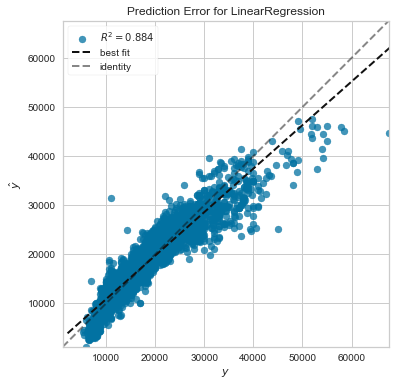

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [27]:
# Instantiate the linear model and visualizer
lm= LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

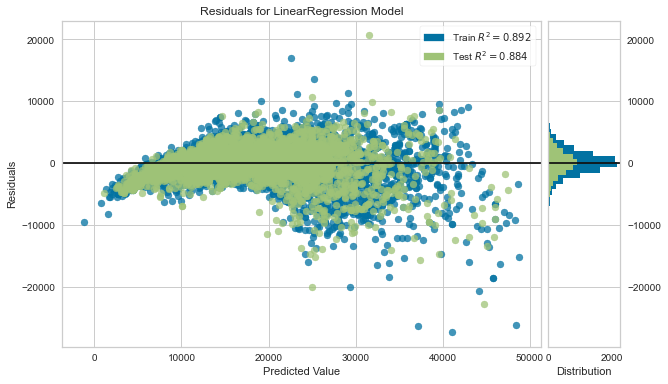

In [28]:
visualizer = ResidualsPlot(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [29]:
data.price.mean()

18024.38058435438

In [30]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [31]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
14268,9998,9486.81561,511.18439
12744,28990,24240.56485,4749.43515
6912,12395,11811.89463,583.10537
11755,16250,17485.87246,-1235.87246
1195,15900,14262.30249,1637.69751
10922,14800,13728.43752,1071.56248
4671,22500,22721.33697,-221.33697
12167,20950,22315.34975,-1365.34975
11650,17490,15787.12763,1702.87237
15611,28900,32093.20918,-3193.20918


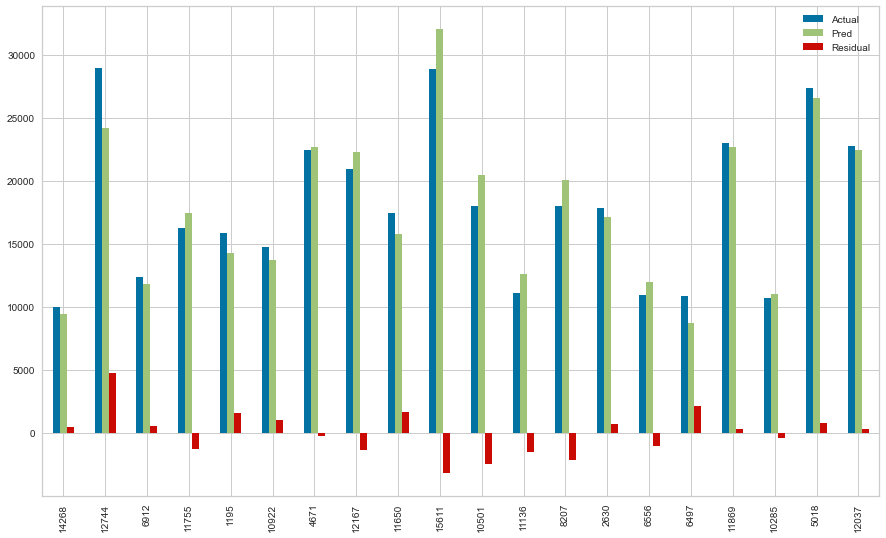

In [32]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

In [33]:
pd.DataFrame(Model.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
make_model_Renault Duster,-8516.90302
make_model_Renault Clio,-3827.34228
make_model_Opel Corsa,-3686.87592
make_model_Opel Astra,-2351.66365
Fuel_Benzine,-1978.88046
ex_Right hand drive,-1941.64509
Fuel_LPG/CNG,-1856.21965
Drive_chain_rear,-1615.14593
age,-1603.28570
Gearing_Type_Manual,-1594.27881


In [34]:
# The coeefficinets are too big. Let's make scaling

In [35]:
scaler = MinMaxScaler()

In [36]:
scaler.fit(X_train)

MinMaxScaler()

In [37]:
X_train = scaler.transform(X_train)

In [38]:
X_train

array([[0.25709779, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.00003785, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.0577918 , 1.        , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.05362776, 0.        , 0.66666667, ..., 0.        , 1.        ,
        0.        ],
       [0.02018927, 0.        , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.08226183, 0.33333333, 0.33333333, ..., 0.        , 1.        ,
        0.        ]])

In [39]:
X_test = scaler.transform(X_test)

In [40]:
X_test

array([[0.00519673, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.00003155, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.53312303, 0.33333333, 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.00519673, 0.33333333, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.06743533, 0.33333333, 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.03470032, 0.        , 0.33333333, ..., 0.        , 1.        ,
        0.        ]])

In [41]:
# Let's run the model again with scaled data

In [42]:
LM = LinearRegression()

In [43]:
LM.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = LM.predict(X_test)

In [45]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [46]:
eval_metrics(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: -2.7388923027108833e+20
MAE 		: 1746806386999.4368
MSE 		: 1.4570112914907517e+28
RMSE 		: 120706722741144.44


In [47]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [48]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
4768,21500,21064.00000,436.00000
13077,15928,16232.00000,-304.00000
7477,14800,16744.00000,-1944.00000
14349,9990,14344.00000,-4354.00000
13607,7900,8248.00000,-348.00000
13303,12000,12072.00000,-72.00000
7830,20605,22856.00000,-2251.00000
6598,17650,15368.00000,2282.00000
12793,35290,26712.00000,8578.00000
1135,19388,24776.00000,-5388.00000


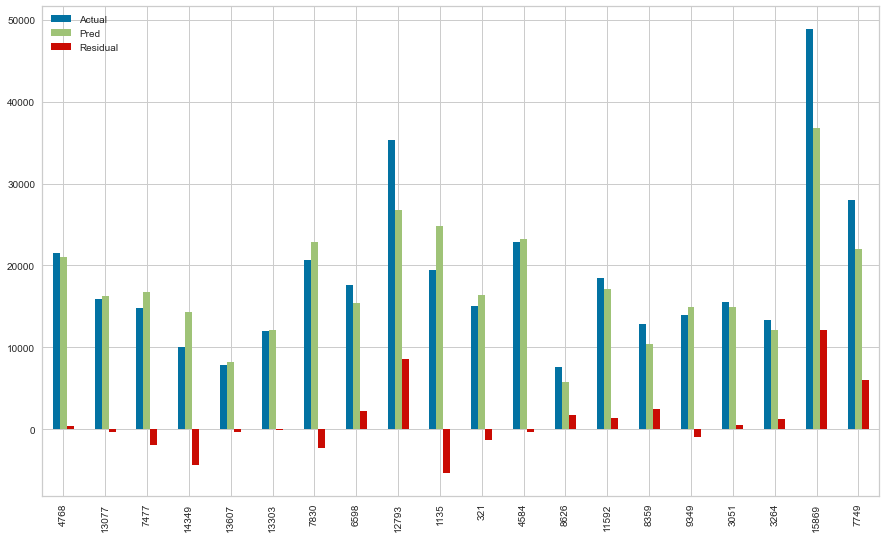

In [49]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

In [50]:
# Implementing Polynomnial 

In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [52]:
polynomial_features= PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)

In [53]:
X_test_poly = polynomial_features.transform(X_test)

In [54]:
LM.fit(X_train_poly, y_train)

LinearRegression()

In [55]:
y_pred = LM.predict(X_test_poly)

In [56]:
eval_metrics(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: -2.3646390100450627e+20
MAE 		: 11430313466038.11
MSE 		: 1.25791939118055e+28
RMSE 		: 112157005629632.88


In [57]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [58]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
10370,11300,11781.93750,-481.93750
5786,15750,16201.68750,-451.68750
3628,30000,27150.68750,2849.31250
7869,22590,23477.68750,-887.68750
9137,8750,8757.18750,-7.18750
9790,9900,10314.43750,-414.43750
12596,29005,29723.68750,-718.68750
4519,23400,27967.68750,-4567.68750
5084,26940,27528.68750,-588.68750
9700,14280,13483.68750,796.31250


## 4. Implement Ridge Regression

In [59]:
RM = Ridge()

In [60]:
RM.fit(X_train, y_train)

Ridge()

In [61]:
y_pred = RM.predict(X_test)

In [62]:
eval_metrics(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8847833300902679
MAE 		: 1726.2105007468576
MSE 		: 6129192.771117256
RMSE 		: 2475.720656923405


In [63]:
# finding alpha for ridge model

In [64]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([  0.01,   1.02,   2.03,   3.04,   4.05,   5.06,   6.07,   7.08,
         8.09,   9.1 ,  10.11,  11.12,  12.13,  13.14,  14.15,  15.16,
        16.17,  17.18,  18.19,  19.2 ,  20.21,  21.22,  22.23,  23.24,
        24.25,  25.26,  26.27,  27.28,  28.29,  29.3 ,  30.31,  31.32,
        32.33,  33.34,  34.35,  35.36,  36.37,  37.38,  38.39,  39.4 ,
        40.41,  41.42,  42.43,  43.44,  44.45,  45.46,  46.47,  47.48,
        48.49,  49.5 ,  50.51,  51.52,  52.53,  53.54,  54.55,  55.56,
        56.57,  57.58,  58.59,  59.6 ,  60.61,  61.62,  62.63,  63.64,
        64.65,  65.66,  66.67,  67.68,  68.69,  69.7 ,  70.71,  71.72,
        72.73,  73.74,  74.75,  75.76,  76.77,  77.78,  78.79,  79.8 ,
        80.81,  81.82,  82.83,  83.84,  84.85,  85.86,  86.87,  87.88,
        88.89,  89.9 ,  90.91,  91.92,  92.93,  93.94,  94.95,  95.96,
        96.97,  97.98,  98.99, 100.  ])

In [65]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 10, scoring='neg_root_mean_squared_error')

In [66]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([  0.01,   1.02,   2.03,   3.04,   4.05,   5.06,   6.07,   7.08,
         8.09,   9.1 ,  10.11,  11.12,  12.13,  13.14,  14.15,  15.16,
        16.17,  17.18,  18.19,  19.2 ,  20.21,  21.22,  22.23,  23.24,
        24.25,  25.26,  26.27,  27.28,  28.29,  29.3 ,  30.31,  31.32,
        32.33,  33.34,  34.35,  35.36,  36.37,  37.38,  38.39,  39.4 ,
        40.41,  41.42,  42.43,  43.44,  44.45,  45.46,  46.47,  47.48,
        48.49,  49.5 ,  50.51,  51.52,  52.53,  53.54,  54.55,  55.56,
        56.57,  57.58,  58.59,  59.6 ,  60.61,  61.62,  62.63,  63.64,
        64.65,  65.66,  66.67,  67.68,  68.69,  69.7 ,  70.71,  71.72,
        72.73,  73.74,  74.75,  75.76,  76.77,  77.78,  78.79,  79.8 ,
        80.81,  81.82,  82.83,  83.84,  84.85,  85.86,  86.87,  87.88,
        88.89,  89.9 ,  90.91,  91.92,  92.93,  93.94,  94.95,  95.96,
        96.97,  97.98,  98.99, 100.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [67]:
ridge_cv_model.alpha_

1.02

In [68]:
y_pred = ridge_cv_model.predict(X_test)

In [69]:
eval_metrics(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.884786453265411
MAE 		: 1726.1743627599583
MSE 		: 6129026.627255211
RMSE 		: 2475.6871020496937


## 5. Implement Lasso Regression

In [70]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [71]:
y_pred = lasso_model.predict(X_test)

In [72]:
eval_metrics(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.885486371412981
MAE 		: 1725.9180679874064
MSE 		: 6091793.011201039
RMSE 		: 2468.1557915174317


In [73]:
# Finding best alpha for Lasso

In [74]:
lasso_cv_model = LassoCV(alphas = alpha_space,  cv = 10, max_iter = 10000).fit(X_train, y_train)

In [75]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(alphas=array([  0.01,   1.02,   2.03,   3.04,   4.05,   5.06,   6.07,   7.08,
         8.09,   9.1 ,  10.11,  11.12,  12.13,  13.14,  14.15,  15.16,
        16.17,  17.18,  18.19,  19.2 ,  20.21,  21.22,  22.23,  23.24,
        24.25,  25.26,  26.27,  27.28,  28.29,  29.3 ,  30.31,  31.32,
        32.33,  33.34,  34.35,  35.36,  36.37,  37.38,  38.39,  39.4 ,
        40.41,  41.42,  42.43,  43.44,  44.45,  45.46,  46.47,  47.48,
        48.49,  49.5 ,  50.51,  51.52,  52.53,  53.54,  54.55,  55.56,
        56.57,  57.58,  58.59,  59.6 ,  60.61,  61.62,  62.63,  63.64,
        64.65,  65.66,  66.67,  67.68,  68.69,  69.7 ,  70.71,  71.72,
        72.73,  73.74,  74.75,  75.76,  76.77,  77.78,  78.79,  79.8 ,
        80.81,  81.82,  82.83,  83.84,  84.85,  85.86,  86.87,  87.88,
        88.89,  89.9 ,  90.91,  91.92,  92.93,  93.94,  94.95,  95.96,
        96.97,  97.98,  98.99, 100.  ]),
        cv=10, max_iter=10000)

In [76]:
lasso_cv_model.alpha_

1.02

In [77]:
eval_metrics(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.885486371412981
MAE 		: 1725.9180679874064
MSE 		: 6091793.011201039
RMSE 		: 2468.1557915174317


## 6. Implement Elastic-Net

In [78]:
elastic_model = ElasticNet()
elastic_model.fit(X_train,y_train)

ElasticNet()

In [79]:
y_pred = elastic_model.predict(X_test)

In [80]:
eval_metrics(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.6167214761475996
MAE 		: 3254.075845529679
MSE 		: 20389306.161696263
RMSE 		: 4515.451933272711


In [81]:
# Finding best alpha and l1_ratio for ElasticNet

In [82]:
param_grid = {'alpha':[1, 2.5, 3, 4, 5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

In [83]:
grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [84]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1, 2.5, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [85]:
grid_model.best_estimator_

ElasticNet(alpha=1, l1_ratio=1)

In [86]:
y_pred = grid_model.predict(X_test)

In [87]:
eval_metrics(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.885486371412981
MAE 		: 1725.9180679874064
MSE 		: 6091793.011201039
RMSE 		: 2468.1557915174317
